# Model Training

In [1]:
import pandas as pd
data=pd.read_csv('mergedData.csv',index_col=[0])
data

,Date,Close,output
0,2020-01-01,184.449997,1
1,2020-01-02,193.750000,2
2,2020-01-03,191.100006,2
3,2020-01-06,185.649994,1
4,2020-01-07,184.699997,0
...,...,...,...
927,2023-09-25,618.700012,1
928,2023-09-26,619.799988,1
929,2023-09-27,620.150024,1
930,2023-09-28,614.099976,1


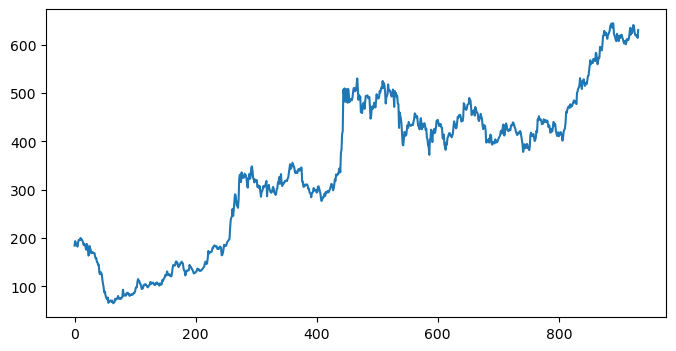

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(data['Close'])

In [3]:
ma100= data['Close'].rolling(20).mean() #moving average of 100 size
ma200= data['Close'].rolling(50).mean() #moving average of 200 size

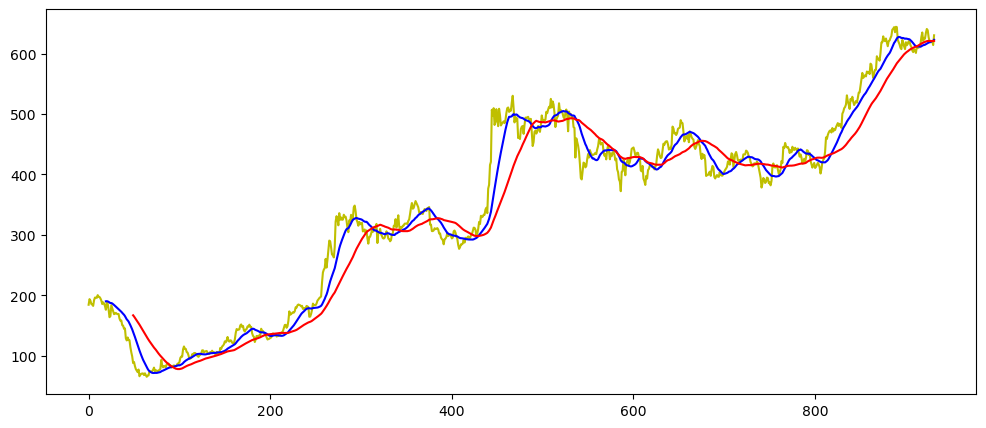

In [4]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'],'y')
plt.plot(ma100,'b')
plt.plot(ma200,'r')

In [5]:
total_size=len(data)
total_size

932

In [6]:
train_size=int(total_size*0.8)
test_size=total_size-train_size
train_size,test_size

(745, 187)

In [7]:
data_training=pd.DataFrame(data[['Close','output']][0:train_size])
data_training.to_csv("data_training.csv" , index=False)
data_testing=pd.DataFrame(data[['Close','output']][train_size:total_size])
data_testing.to_csv("data_testing.csv" , index=False)

In [8]:
data_training

,Close,output
0,184.449997,1
1,193.750000,2
2,191.100006,2
3,185.649994,1
4,184.699997,0
...,...,...
740,394.450012,1
741,378.350006,1
742,384.799988,1
743,394.149994,1


In [9]:
data_testing

,Close,output
745,385.899994,2
746,387.950012,1
747,394.799988,1
748,393.899994,2
749,385.600006,1
...,...,...
927,618.700012,1
928,619.799988,1
929,620.150024,1
930,614.099976,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
train_data=scale.fit_transform(data_training)
train_data

array([[0.25631922, 0.5       ],
       [0.27632568, 1.        ],
       [0.27062493, 1.        ],
       ...,
       [0.68731843, 0.5       ],
       [0.70743245, 0.5       ],
       [0.70130143, 1.        ]])

In [11]:
#defining features (100)
x_train=[]
y_train=[]
import numpy as np

In [12]:
n=10
for i in range(n,train_data.shape[0]):
    li1=[]
    for j in range(0,n):
        li1.append(train_data[i-n][0])
        li1.append(train_data[i-n][1])
    x_train.append(li1)
    y_train.append(train_data[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [13]:
x_train.shape

(735, 20)

In [14]:
x_train

array([[0.25631922, 0.5       , 0.25631922, ..., 0.5       , 0.25631922,
        0.5       ],
       [0.27632568, 1.        , 0.27632568, ..., 1.        , 0.27632568,
        1.        ],
       [0.27062493, 1.        , 0.27062493, ..., 1.        , 0.27062493,
        1.        ],
       ...,
       [0.75045708, 0.5       , 0.75045708, ..., 0.5       , 0.75045708,
        0.5       ],
       [0.75981495, 1.        , 0.75981495, ..., 1.        , 0.75981495,
        1.        ],
       [0.7585242 , 1.        , 0.7585242 , ..., 1.        , 0.7585242 ,
        1.        ]])

In [15]:
y_train.shape

(735,)

In [16]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:
model=Sequential()
#layer_1
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#layer_2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

#layer_3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

#layer_4
model.add(LSTM(units=100,activation='relu'))
model.add(Dropout(0.5))
          
#last layer
model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)


Epoch 1/100

23/23 [==============================] - 5s 36ms/step - loss: 0.1703
Epoch 2/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0744
Epoch 3/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0566
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 0.0498
Epoch 5/100
23/23 [==============================] - 1s 36ms/step - loss: 0.0462
Epoch 6/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0408
Epoch 7/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0337
Epoch 8/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0345
Epoch 9/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0340
Epoch 10/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0300
Epoch 11/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0282
Epoch 12/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0235
Epoch 13/100
23/23 [===

23/23 [==============================] - 1s 35ms/step - loss: 0.0071
Epoch 97/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0073
Epoch 98/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0077
Epoch 99/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0072
Epoch 100/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0079


In [20]:
model.save("lstm_saved_model_final.keras")